# Lab Assignment 2: Regression and Classification
Please refer to the `README.md` for full laboratory instructions--part of the `README.md` is replicated below for your reference.

## Part A: Linear Regression

We are given data used in a study of the homicide rate (HOM) in Detroit, over the years 1961-1973. The following data were collected by J.C. Fisher, and used in his paper ”Homicide in Detroit: The Role of Firearms,” Criminology, vol. 14, pp. 387-400, 1976. Each row is for a year, and each column are values of a variable. A picture of the table for your reference immediately follows, but have access to the raw data in this lab.

![image](https://peilundai.com/ps2_programming/table.png)

* FTP    - Full-time police per 100,000 population
* UEMP   - % unemployed in the population
* MAN    - number of manufacturing workers in thousands
* LIC    - Number of handgun licenses per 100,000 population
* GR     - Number of handgun registrations per 100,000 population
* NMAN   - Number of non-manufacturing workers in thousands
* GOV    - Number of government workers in thousands
* HE     - Average hourly earnings
* WE     - Average weekly earnings
* HOM    - Number of homicides per 100,000 population

It turns out that three of the variables together are good predictors of the homicide rate: `FTP`, `WE`, and one more variable.

Use methods described in Chapter 3 of the textbook to devise a mathematical formulation to determine the third variable. Implement your formulation and then conduct experiments to determine the third variable. In your report, be sure to provide the step-by-step mathematical formulation (citing Chapter 3 as needed) that corresponds to the implementation you turn in. Also give plots and a rigorous argument to justify the scheme you use and your conclusions.

### Accessing the Data Set
The data is stored in a file called `detroit.npy`. `detroit.npy` has already been loaded into this environment, so you do not need to run this following cell. The command for how you can get data like this is included for your reference and edification.

You can find the data under the path:
`Assignment2/detroit.npy`.

In [8]:
# download data. 
#!wget https://peilundai.com/ps2_programming/detroit.npy

### Write and Run Your Own Code

In [3]:
#Library declarations
import matplotlib.pyplot as plt
import numpy as np

(13, 10)
[[ 260.35   11.    455.5   178.15  215.98  538.1   133.9     2.98  117.18
     8.6 ]
 [ 269.8     7.    480.2   156.41  180.48  547.6   137.6     3.09  134.02
     8.9 ]
 [ 272.04    5.2   506.1   198.02  209.57  562.8   143.6     3.23  141.68
     8.52]
 [ 272.96    4.3   535.8   222.1   231.67  591.    150.3     3.33  147.98
     8.89]
 [ 272.51    3.5   576.    301.92  297.65  626.1   164.3     3.46  159.85
    13.07]
 [ 261.34    3.2   601.7   391.22  367.62  659.8   179.5     3.6   157.19
    14.57]
 [ 268.89    4.1   577.3   665.56  616.54  686.2   187.5     3.73  155.29
    21.36]
 [ 295.99    3.9   596.9  1131.21 1029.75  699.6   195.4     2.91  131.75
    28.03]
 [ 319.87    3.6   613.5   837.6   786.23  729.9   210.3     4.25  178.74
    31.49]
 [ 341.43    7.1   569.3   794.9   713.77  757.8   223.8     4.47  178.3
    37.39]
 [ 356.59    8.4   548.8   817.74  750.43  755.3   227.7     5.04  209.54
    46.26]
 [ 376.69    7.7   563.4   583.17 1027.38  787.    230.9 

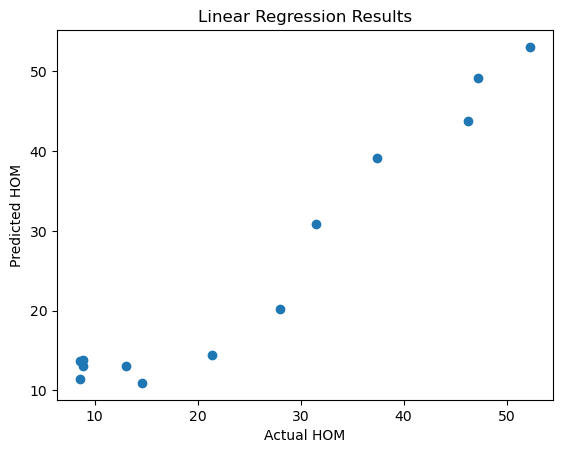

In [4]:
# load data
data=np.load('detroit.npy')
print(data.shape)
print(data)

# Note: Least-squares linear regression in Python can be done with the help of np.linalg.lstsq()

## PLEASE ADD YOUR CODE HERE
def linear_regression(X, y):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X] # translates slice objects  to concatenation along the second axis
    theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y) # θ = (X^T X)^(-1) X^T y
    return theta

best_variable = None
best_r_squared = 0
ftp_index = 0
we_index = 8

for i in range(data.shape[1] - 1): 
    if i == ftp_index or i == we_index:
        continue

    X = data[:, [ftp_index, we_index, i]]
    y = data[:, -1]  # HOM is the last column

    b = linear_regression(X, y)
   
    y_pred = np.c_[np.ones((X.shape[0], 1)), X].dot(b)
   
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
   
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_variable = i

print(f"Best variable index: {best_variable}, R-squared: {best_r_squared}")
plt.scatter(data[:, -1], y_pred)
plt.xlabel('Actual HOM')
plt.ylabel('Predicted HOM')
plt.title('Linear Regression Results')
plt.show()

In [11]:
## PLEASE ADD ADDITIONAL CELLS AS NEEDED

### What to Submit
You should submit a single .pdf file that contains the following:
1. A brief post-lab write-up that contains the following for each part of this assignment:

    a. Your paper design.
    
    b. A brief description of your model. Justify your selection of model parameters.
    
    c. An evaluation of your model, including evidence as appropriate.
    
    d. A brief (couple of sentences) reflection on your take-aways from this lab exercise.

This code performs multiple linear regression to predict the last column of the dataset (HOM) using different combinations of predictor variables. The goal is to determine which additional variable, when included alongside two pre-selected variables, maximizes the coefficient of determination (𝑅^2). 

The dataset ∈ (R^(N X M)) where N is no of obvs, and M is no of features, and the target variable is the last column.

y = XB + e
where X ∈ (R^(N X (d+1))) is the matrix of predictor variables (including the intercept)
b ∈ (R^(d+1)) is the vector of regression coefficients
e ~ N(0, σ^2 I) is the error term

least squares estimate of b is 
b = (X^T X)^-1 X^T y, which is computed by linear_regression(X,y) -> easier to understand than the built in fxn. 

The code loops through all variables except for two preselected variables (with indices ftp_index = 0 and we_index = 8). The goal is to find the third variable that maximizes 𝑅^2

The perdicted values of y, y^ = Xb
SS_total = ∑^N_n=1 (y_n - y^-)^2,  yˉ is the mean of y_ns
SS_residual = ∑^N_n=1 (y_n - y^_n)^2

R^2 = 1 - SS_residual/SS_total

​If the new 𝑅^2 is higher than the previously stored best value, the corresponding variable is stored as the best predictor.

To evaluate my model, I think it's fairly good, because, although it'snot a directly proportional line between actual and predicted results, it's pretty close, and the R^2 value is high.

My takeaway is that linear regression is pretty difficult to translate from paper to code. Loading the dataset, extracting the target variable, iteration, keeping track of the variable that maximises R^2 was not trivial.
 
